<h1 style="text-align: center; font-weight: bold;"><u>Étape 5 Réaliser une analyse multi-variée</u></h1>

<h2 style="font-weight: bold;"><u>Import et chargement des données</u></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from myFonctions import plot_scatter
from myFonctions import plot_elbow_curve2
from myFonctions import plot_correlation_circle
from myFonctions import plot_pca_projection
from myFonctions import plot_nutrition_scatter
from myFonctions import plot_pca_individuals

# Charger les données
nutritional_products = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

<h2 style="font-weight: bold;">5.A)<u>ACP</u></h2> 

omega-3-fat_100g           319931
omega-6-fat_100g           320584
iron_100g                  180310
energy-from-fat_100g       319915
calcium_100g               179722
nutrition-score-fr_100g     99562
dtype: int64


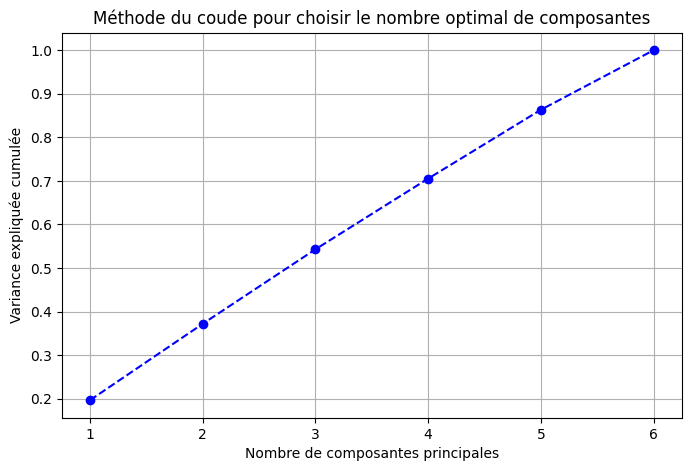

In [2]:
# Sélectionner les variables quantitatives pour l'ACP
columns_for_pca = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'energy-from-fat_100g', 'calcium_100g', 'nutrition-score-fr_100g']

# Vérifier les valeurs manquantes
print(nutritional_products[columns_for_pca].isna().sum())

# Remplacement des valeurs manquantes par la médiane
nutritional_products_clean = nutritional_products[columns_for_pca].fillna(nutritional_products[columns_for_pca].median())

# Vérifier si le DataFrame est vide après correction
#print(f"Nombre total de lignes après remplacement des NaN : {nutritional_products_clean.shape[0]}")

# Standardisation des données
scaler = StandardScaler()
nutritional_products_scaled = scaler.fit_transform(nutritional_products_clean)

# Affichage de la forme des données après standardisation
#print(f"Shape du dataset après standardisation: {nutritional_products_scaled.shape}")

pca_model = plot_elbow_curve2(nutritional_products_scaled)

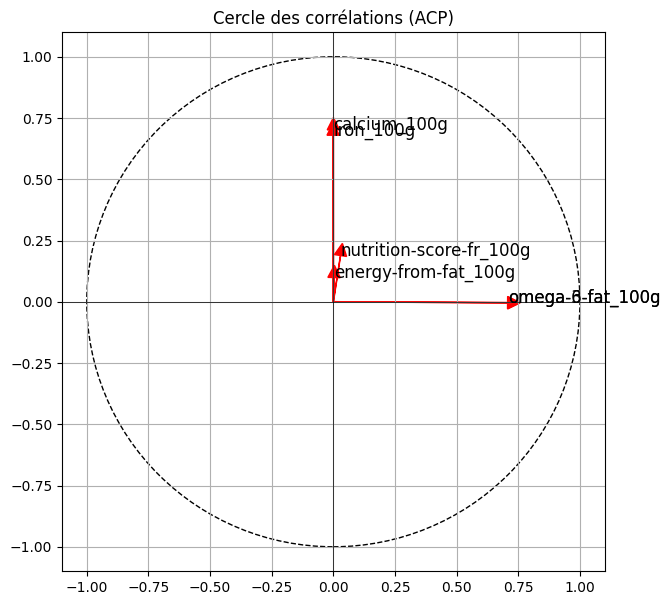

In [7]:
# Appeler la fonction après l'entraînement de ton modèle PCA
plot_correlation_circle(pca_model, columns_for_pca)

In [8]:
# Exemple d'utilisation (avec tes propres fonctions de cercle de corrélation et de coude)
df_synth = plot_pca_individuals(nutritional_products, plot_correlation_circle, pca_model, color_col='nutrition-score-fr_100g')

C:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\smartcity-ikQj8sYD-py3.13\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['no_nutriments' 'ingredients_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil' 'nutrition_grade_uk'
 'butyric-acid_100g' 'caproic-acid_100g' 'lignoceric-acid_100g'
 'cerotic-acid_100g' 'melissic-acid_100g' 'elaidic-acid_100g'
 'mead-acid_100g' 'erucic-acid_100g' 'nervonic-acid_100g'
 'chlorophyl_100g' 'glycemic-index_100g' 'water-hardness_100g']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: Shape of passed values is (320772, 90), indices imply (320772, 106)

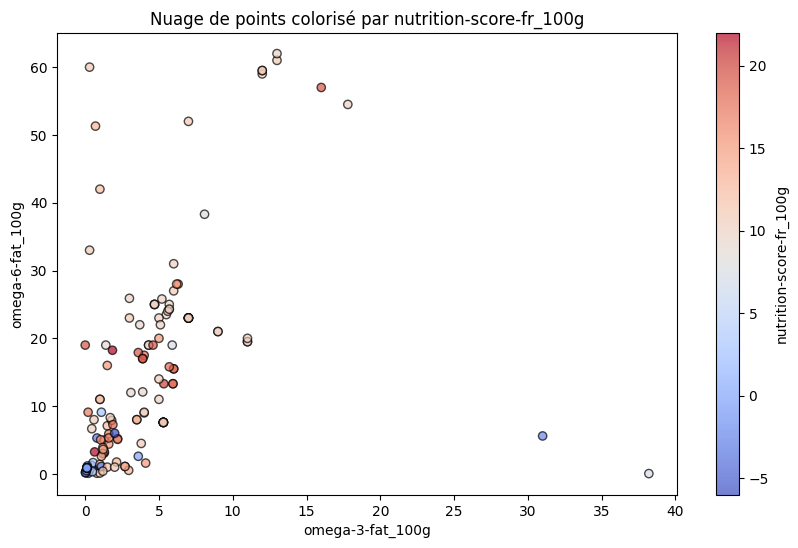

In [9]:
# Affichage du nuage de points en fonction des protéines et lipides
plot_nutrition_scatter(nutritional_products, 'omega-3-fat_100g', 'omega-6-fat_100g')

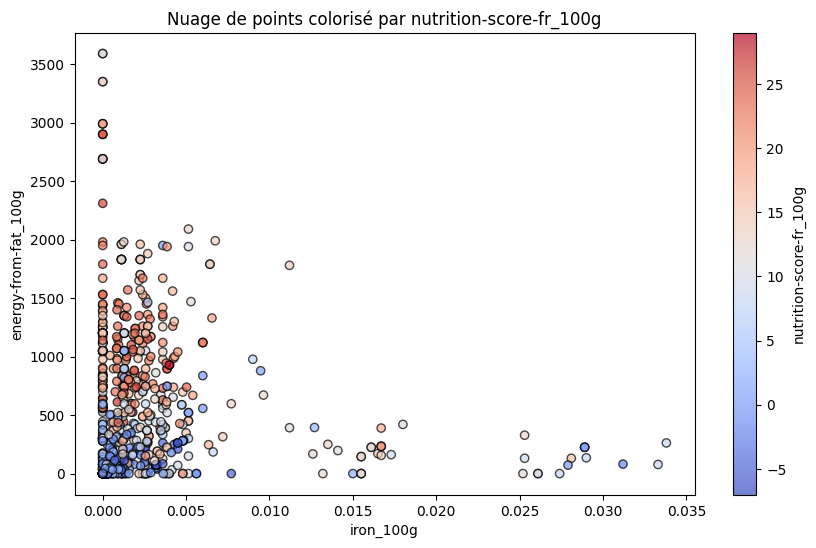

In [10]:
plot_nutrition_scatter(nutritional_products, 'iron_100g', 'energy-from-fat_100g')

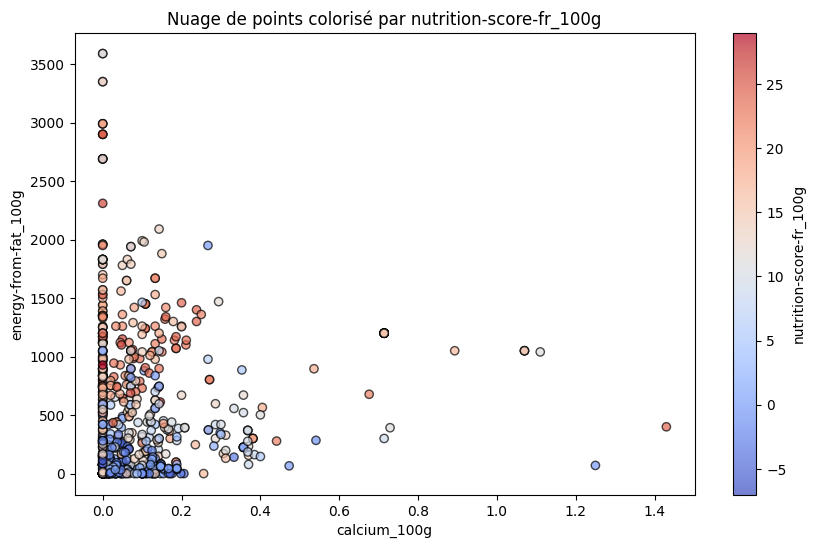

In [11]:
plot_nutrition_scatter(nutritional_products, 'calcium_100g', 'energy-from-fat_100g')

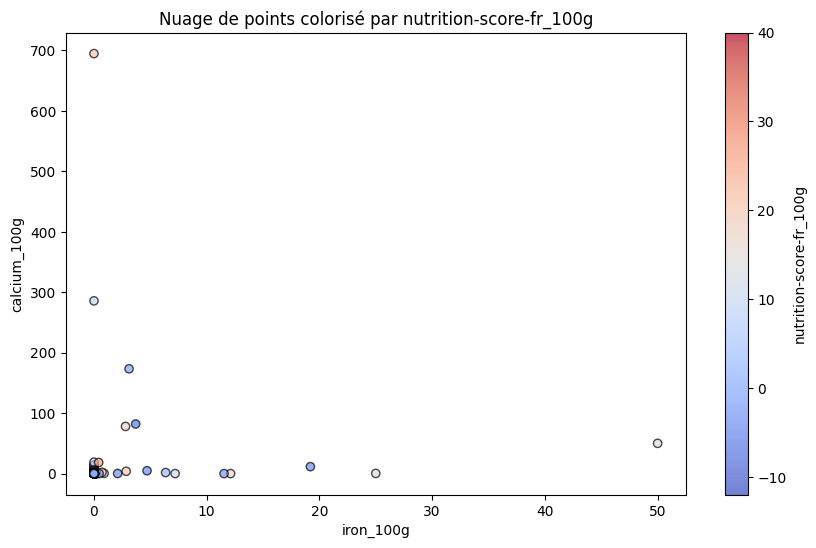

In [12]:
plot_nutrition_scatter(nutritional_products, 'iron_100g', 'calcium_100g')